# Link based ranking

**Preliminaries:** If you want to normalize a vector to L1-norm or L2-norm, use:

In [2]:
from __future__ import print_function, division
import numpy as np

pr = np.array([1,2,3])
print("L1-norm of {0} is {1}".format(pr, pr / np.linalg.norm(pr,1)))
print("L2-norm of {0} is {1}".format(pr, pr / np.linalg.norm(pr,2)))

L1-norm of [1 2 3] is [0.16666667 0.33333333 0.5       ]
L2-norm of [1 2 3] is [0.26726124 0.53452248 0.80178373]


## Page Rank (Eigen-vector method)
Consider a tiny Web with three pages A, B and C with no inlinks,
and with initial PageRank = 1. Initially, none of the pages link to
any other pages and none link to them. 
Answer the following questions, and calculate the PageRank for
each question.

1. Link page A to page B.
2. Link all pages to each other.
3. Link page A to both B and C, and link pages B and C to A.
4. Use the previous links and add a link from page C to page B.

**Hints:**
We are using the theoretical PageRank computation (without source of rank). See slide "Transition Matrix for Random Walker" in the lecture note. Columns of link matrix are from-vertex, rows of link matrix are to-vertex. We take the eigenvector with the largest eigenvalue.
We only care about final ranking of the probability vector. You can choose the normalization (or not) of your choice).

In [3]:
def create_Rmatrix(L):
#     R = np.multiply(L, 1 / np.sum(L,axis=0)) # Use this matrix multiplication for faster running time if no column is zero
    X = np.sum(L,axis=0)
    n_nodes = L.shape[0]
    R = np.zeros((n_nodes, n_nodes))
    for i in range(L.shape[0]):
        for j in range(L.shape[1]):
            R[i,j] = L[i,j] / X[0,j] if X[0,j] != 0 else 0
            
#     R = np.multiply(L,R)
    return R

In [4]:
"""Some time we might want to compute R outside the function to avoid recomputing large matrix"""
def pagerank_eigen(L, R=None):
#   Construct transition probability matrix from L
    if R is None: R = create_Rmatrix(L)
#     Compute eigen-vectors and eigen-values of R
    eigenvalues, eigenvectors = np.linalg.eig(R)
#     Take the eigen-vector with maximum eigven-value
    p = eigenvectors[:,np.argmax(np.absolute(eigenvalues))]
    return (R,p)


In [5]:
# Test with the question, e.g.
L = np.matrix([
    [0,1,1], 
    [1,0,1], 
    [1,1,0]
])
R,p = pagerank_eigen(L)
print("L={0}\nR={1}\np={2}".format(L,R,p))

L=[[0 1 1]
 [1 0 1]
 [1 1 0]]
R=[[0.  0.5 0.5]
 [0.5 0.  0.5]
 [0.5 0.5 0. ]]
p=[0.57735027 0.57735027 0.57735027]


1.Link page A to page B

Result:
$
L =
  \begin{bmatrix}
	0 & 0 & 0 \\
1 & 0 & 0 \\
0 & 0 & 0 \\
  \end{bmatrix}
 ,
R =
  \begin{bmatrix}
	0 & 0 & 0 \\
1 & 0 & 0 \\
0 & 0 & 0 \\
  \end{bmatrix}
  ,
  \vec{p} =
  \begin{bmatrix}
	0 \\
1 \\
0 \\
  \end{bmatrix}
$

In [ ]:
L = np.matrix([
    [0,0,0], 
    [1,0,0], 
    [0,0,0]
])

R,p = pagerank_eigen(L)
print("L={0}\nR={1}\np={2}".format(L,R,p))

2.Link all pages to each other

Result:
$
L =
  \begin{bmatrix}
	0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0 \\
  \end{bmatrix}
 ,
R =
  \begin{bmatrix}
	0 & \frac{1}{2} & \frac{1}{2} \\
\frac{1}{2} & 0 & \frac{1}{2} \\
\frac{1}{2} & \frac{1}{2} & 0 \\
  \end{bmatrix}
  ,
  \vec{p} =
  \begin{bmatrix}
	0.577 \\
0.577 \\
0.577 \\
  \end{bmatrix}
$

In [ ]:
L = np.matrix([
    [0,1,1], 
    [1,0,1], 
    [1,1,0]
])

R,p = pagerank_eigen(L)
print("L={0}\nR={1}\np={2}".format(L,R,p))

3.Link page A to both B and C, and link pages B and C to A.

Result:
$
L =
  \begin{bmatrix}
	0 & 1 & 1 \\
1 & 0 & 0 \\
1 & 0 & 0 \\
  \end{bmatrix}
 ,
R =
  \begin{bmatrix}
	0 & 1 & 1 \\
\frac{1}{2} & 0 & 0 \\
\frac{1}{2} & 0 & 0 \\
  \end{bmatrix}
  ,
  \vec{p} =
  \begin{bmatrix}
	0.816 \\
0.408 \\
0.408 \\
  \end{bmatrix}
$

In [ ]:
L = np.matrix([
    [0,1,1], 
    [1,0,0], 
    [1,0,0]
])

R,p = pagerank_eigen(L)
print("L={0}\nR={1}\np={2}".format(L,R,p))

4.Use the previous links and add a link from page C to page B

Result:
$
L =
  \begin{bmatrix}
	0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 0 & 0 \\
  \end{bmatrix}
 ,
R =
  \begin{bmatrix}
	0 & 1 & \frac{1}{2} \\
\frac{1}{2} & 0 & \frac{1}{2} \\
\frac{1}{2} & 0 & 0 \\
  \end{bmatrix}
  ,
  \vec{p} =
  \begin{bmatrix}
	0.743 \\
0.557 \\
0.371 \\
  \end{bmatrix}
$

In [ ]:
L = np.matrix([
    [0,1,1], 
    [1,0,1], 
    [1,0,0]
])

R,p = pagerank_eigen(L)
print("L={0}\nR={1}\np={2}".format(L,R,p))

## Page Rank (Iterative method)

The eigen-vector method has some numerical issues (when computing eigen-vector) and not scalable with large datasets.

We will apply the iterative method in the slide "Practical Computation of PageRank" of the lecture.

Dataset for practice: https://snap.stanford.edu/data/ca-GrQc.html. It is available within the same folder of this github.

In [6]:
def pagerank_iterative(L, R=None):
    if R is None: #We might want to compute R outside this function to avoid recomputing large matrix
        R = np.multiply(L, 1 / np.sum(L,axis=0))
        
    N = R.shape[0]
    e = np.ones(shape=(N,1))
    q = 0.9

    p = e
    delta = 1
    epsilon = 0.001
    i = 0
    while delta > epsilon:
        p_prev = p
        p = np.matmul(q * R, p_prev)
        p = p + (1-q) / N * e
        delta = np.linalg.norm(p-p_prev,1)
        i += 1

    print("Converged after {0} iterations".format(i))
    return R,p

### Construct link matrix from dataset

In [7]:
n_nodes = 0
nodes_idx = dict() #Since the nodeIDs are not from 0 to N we need to build an index of nodes
nodes = [] #We also want to store nodeIDs to return the result of ranking vector

# Read the nodes
with open("ca-GrQc.txt") as f:
    for line in f:
        if '#' not in line:
            source = int(line.split()[0])
            target = int(line.split()[1])
            if source not in nodes_idx.keys():
                nodes_idx[source] = n_nodes
                nodes.append(source)
                n_nodes += 1
            if target not in nodes_idx.keys():
                nodes_idx[target] = n_nodes
                nodes.append(target)
                n_nodes += 1
print(n_nodes)
print(nodes[:3])

5242
[3466, 937, 5233]


In [8]:
L = np.zeros((n_nodes, n_nodes))
# Read the edges
with open("ca-GrQc.txt") as f:
    for line in f:
        if "#" not in line:
            source = int(line.split()[0])
            target = int(line.split()[1])
            L[nodes_idx[target], nodes_idx[source]] = 1 #Columns of link matrix are from-vertices
print(L)

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


### Compute transition probability matrix

In [9]:
# Here I use matrix multiplication from numpy for faster running time
R = np.multiply(L, 1 / np.sum(L,axis=0))
# R = create_Rmatrix(L) # This is much slower
print(R)



[[0.    0.2   0.5   ... 0.    0.    0.   ]
 [0.125 0.    0.    ... 0.    0.    0.   ]
 [0.125 0.    0.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.5   0.5  ]
 [0.    0.    0.    ... 0.5   0.    0.5  ]
 [0.    0.    0.    ... 0.5   0.5   0.   ]]


### You will see that eigen-vector method is slow and has some numerical issues


In [ ]:
import time
start_time = time.time()
R,p = pagerank_eigen(L, R)
print("--- %s seconds ---" % (time.time() - start_time))
print("Ranking vector: p={0}".format(p))
# print(eigenvectors)

### Iterative method

In [10]:
import time
start_time = time.time()
R, p = pagerank_iterative(L,R)
print("--- %s seconds ---" % (time.time() - start_time))
print("Ranking vector: p={0}".format(p[:,0]))

Converged after 128 iterations
--- 17.1170973777771 seconds ---
Ranking vector: p=[2.91315639e-04 1.88382754e-04 8.39741651e-05 ... 1.92156702e-04
 1.92156702e-04 1.92156702e-04]


### Extract top-k nodes from the ranking vector

In [13]:
arr = np.array(p[:,0])
k = 3
k_idx = arr.argsort()[-k:][::-1]
print("Top-{0} nodes: {1}".format(k, np.array(nodes)[k_idx]))
print("Their scores: {0}".format(arr[k_idx]))

Top-3 nodes: [14265 13801 13929]
Their scores: [0.00144951 0.00141553 0.00138011]


## Ranking Methodology (Hard)

1. Give a directed graph, as small as possible, satisfying all the properties mentioned below:

    1. There exists a path from node i to node j for all nodes i,j in the directed
graph. Recall, with this property the jump to an arbitrary node in PageRank
is not required, so that you can set q = 1 (refer lecture slides).

    2. HITS authority ranking and PageRank ranking of the graph nodes are different.

2. Give intuition/methodology on how you constructed such a directed graph with
the properties described in (a).

3. Are there specific graph structures with arbitrarily large instances where PageRank
ranking and HITS authority ranking are the same?

Solutions in pdf..

## Hub and Authority

### a)

Let the adjacency matrix for a graph of four vertices ($n_1$ to $n_4$) be
as follows:

$
A =
  \begin{bmatrix}
	0 & 1 & 1 & 1  \\
	0 & 0 & 1 & 1 \\
	1 & 0 & 0 & 1 \\
	0 & 0 & 0 & 1 \\
  \end{bmatrix}
$

Calculate the authority and hub scores for this graph using the
HITS algorithm with k = 6, and identify the best authority and
hub nodes.

### b)
Apply the HITS algorithm to the dataset: https://snap.stanford.edu/data/ca-GrQc.html

**Hint:** We follow the slide "HITS algorithm" in the lecture. **Denote $x$ as authority vector and $y$ as hub vector**. You can use matrix multiplication for the update steps in the slide "Convergence of HITS". Note that rows of adjacency matrix is from-vertex and columns of adjacency matrix is to-vertex.

In [14]:
def hits_iterative(A, k = 10):
    N = A.shape[0]
    x0, y0 = 1 / (N*N) * np.ones(N), 1 / (N*N) * np.ones(N) 
    xprev, yprev = x0, y0
    delta1 = delta2 = 1
    epsilon = 0.001 # We can strictly check for convergence rate of HITS algorithm
    l = 0
    while l < k and delta1 > epsilon and delta2 > epsilon:
        y = np.matmul(A, xprev)
        x = np.matmul(np.transpose(A), y) 
        x = x / np.linalg.norm(x,2)
        y = y / np.linalg.norm(y,2)
        delta1 = np.linalg.norm(x-xprev,1)
        delta2 = np.linalg.norm(y-yprev,1)
        xprev = x
        yprev = y
        l += 1
    
    print("Ran a total of {0} iterations with the convergence rate delta1, delta2={1},{2}".format(l, delta1, delta2))
    return xprev, yprev

#### a)

In [15]:
A=np.array([
    [0, 1, 1, 1], 
    [0, 0, 1, 1], 
    [1, 0, 0, 1],
    [0, 0, 0, 1],
])

x, y = hits_iterative(A, 100)
print("Result using iterative method:\n Authoriy vector x={0}\n Hub vector y={1}".format(x, y))

Ran a total of 4 iterations with the convergence rate delta1, delta2=0.0006129616443491248,0.0016852780559585279
Result using iterative method:
 Authoriy vector x=[0.16854345 0.27253834 0.49794598 0.80583234]
 Hub vector y=[0.65541849 0.54207544 0.40532459 0.33510118]


**Details:**
+ Initialization: 
  
  $x_0 = \frac{1}{4^2}(1,1,1,1) = ( 0.0625,  0.0625,  0.0625,  0.0625)$
  
  $y_0 = \frac{1}{4^2}(1,1,1,1) = ( 0.0625,  0.0625,  0.0625,  0.0625)$
  
+ $k=1$:
  
  $x_1 = \frac{A^t y_0}{||A^t y_0||} = (0.21320072,  0.21320072,  0.42640143,  0.85280287)$
  
  $y_1 = \frac{A x_0}{|| A x_0 ||} = (0.70710678,  0.47140452,  0.47140452,  0.23570226)$
  
+ ...:
  
+ $k=6$:
  
   $x_6 = \frac{A^t y_5}{||A^t y_5||} = (0.16887796,  0.27257494,  0.49774555, 0.80587375)$
  
  $y_6 = \frac{A x_5}{||A x_5||} = (0.65357971,  0.54153747,  0.40815386,  0.33612671)$
  

**Conclusion:**
+ Best authority node: $n_4$. Best hub node: $n_1$.
 
**Check with the theoretical result (convergence condition):**
  
+ $x^*$ is the principal eigenvector (i.e. with largest eigenvalue) of $A^t A$: $(0.16845787,  0.27257056,  0.49801119,  0.80579904)$
  
+ $y^*$ is the principal eigenvector (i.e. with largest eigenvalue) of $A A^t$: $(0.65549599,  0.54215478,  0.4051188,   0.33507008)$

#### b)
We reuse the link matrix $L$ to compute the adjacency matrix $A$ of the dataset

In [16]:
A = np.transpose(L)
print(A)

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


Run HITS algorithm:

In [17]:
x, y = hits_iterative(A, 100)
print("Result using iterative method:\n Authoriy vector x={0}\n Hub vector y={1}".format(x, y))

Ran a total of 22 iterations with the convergence rate delta1, delta2=0.0008757061781088304,0.0010491474133434914
Result using iterative method:
 Authoriy vector x=[3.48948782e-05 1.45965227e-05 6.68131191e-06 ... 2.07766184e-61
 2.07766184e-61 2.07766184e-61]
 Hub vector y=[3.48948790e-05 1.45965251e-05 6.68131268e-06 ... 4.73879981e-60
 4.73879981e-60 4.73879981e-60]


**You can see that the two authority vector and hub vector are the same. So the network must be an undirected graph**

**Interpret the result:**

In [18]:
k = 3

arr = np.array(x)
k_idx = arr.argsort()[-k:][::-1]
print("Top-{0} authorities: {1}".format(k, np.array(nodes)[k_idx]))
print("Their scores: {0}".format(arr[k_idx]))

arr = np.array(y)
k_idx = arr.argsort()[-k:][::-1]
print("Top-{0} hubs: {1}".format(k, np.array(nodes)[k_idx]))
print("Their scores: {0}".format(arr[k_idx]))

Top-3 authorities: [21012  2741 12365]
Their scores: [0.15556241 0.15357491 0.15307259]
Top-3 hubs: [21012  2741 12365]
Their scores: [0.15556241 0.15357491 0.15307259]


**We can also use linear algebra property of HITS to compute the result (slide "Convergence of HITS"):**.
  
+ $x^*$ is the principal eigenvector (i.e. with largest eigenvalue) of $A^t A$
+ $y^*$ is the principal eigenvector (i.e. with largest eigenvalue) of $A A^t$

However, the computation will be much slower

In [ ]:
xstar_ev, xstar = np.linalg.eig(np.matmul(np.transpose(A),A))
ystar_ev, ystar = np.linalg.eig(np.matmul(A,np.transpose(A)))
xstar, ystar = xstar[:,np.argmax(np.absolute(xstar_ev))], ystar[:,np.argmax(np.absolute(ystar_ev))]
# ystar = -xstar if all(xstar<0) else xstar
# ystar = -ystar if all(ystar<0) else ystar
print("Result using linear algebra:\n Authoriy vector x={0}\n Hub vector y={1}".format(xstar, ystar))


# Introducing Word Embeddings

In this exercise, we would train word embeddings using a state-of-the-art embeddings library fastText. The first step of the exercise is to install the fasttext library. Proceed with the following steps:

## FastText installation

> pip install fasttext

If you are having problems, try this command:
> sudo apt-get install g++

## Generate Embeddings

In [4]:
import fasttext
import numpy as np

In [5]:
model = fasttext.train_unsupervised('epfldocs.txt', model = 'cbow')
vocabulary = model.words
word_embeddings = np.array([model[word] for word in vocabulary])

## Use Pretrained Embeddings
If you are unable to install fasttext, you can use the preembeddings we provide.

In [3]:
import sys
import codecs
import numpy as np

# Edit this, or just move model_epfldocs.vec to the directory where this notebook is situated
directory_path = './'

def load_embeddings(file_name):
    with codecs.open(file_name, 'r', 'utf-8') as f_in:
        lines = f_in.readlines()
        lines = lines[1:]
        vocabulary, wv = zip(*[line.strip().split(' ', 1) for line in lines])
    wv = np.loadtxt(wv)
    return wv, vocabulary


# Replace the path based on your own machine.
word_embeddings, vocabulary = load_embeddings(directory_path + 'model_epfldocs.vec')

## Visualize Embeddings

In the third phase of this exercise, we will visualize the generated embeddings using t-SNE (T-Distributed Stochastic Neighbouring Entities). t-SNE is a dimensionality reduction algorithm which is well suited for such visualization tasks.


In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
import logging

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, init = 'pca') # Changed the parameters for provided in the exercise for less KL divergence and better readibility
vis_data = tsne.fit_transform(word_embeddings)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 432 samples in 0.001s...
[t-SNE] Computed neighbors for 432 samples in 0.035s...
[t-SNE] Computed conditional probabilities for sample 432 / 432
[t-SNE] Mean sigma: 0.071940
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.063786
[t-SNE] KL divergence after 1000 iterations: 0.116455


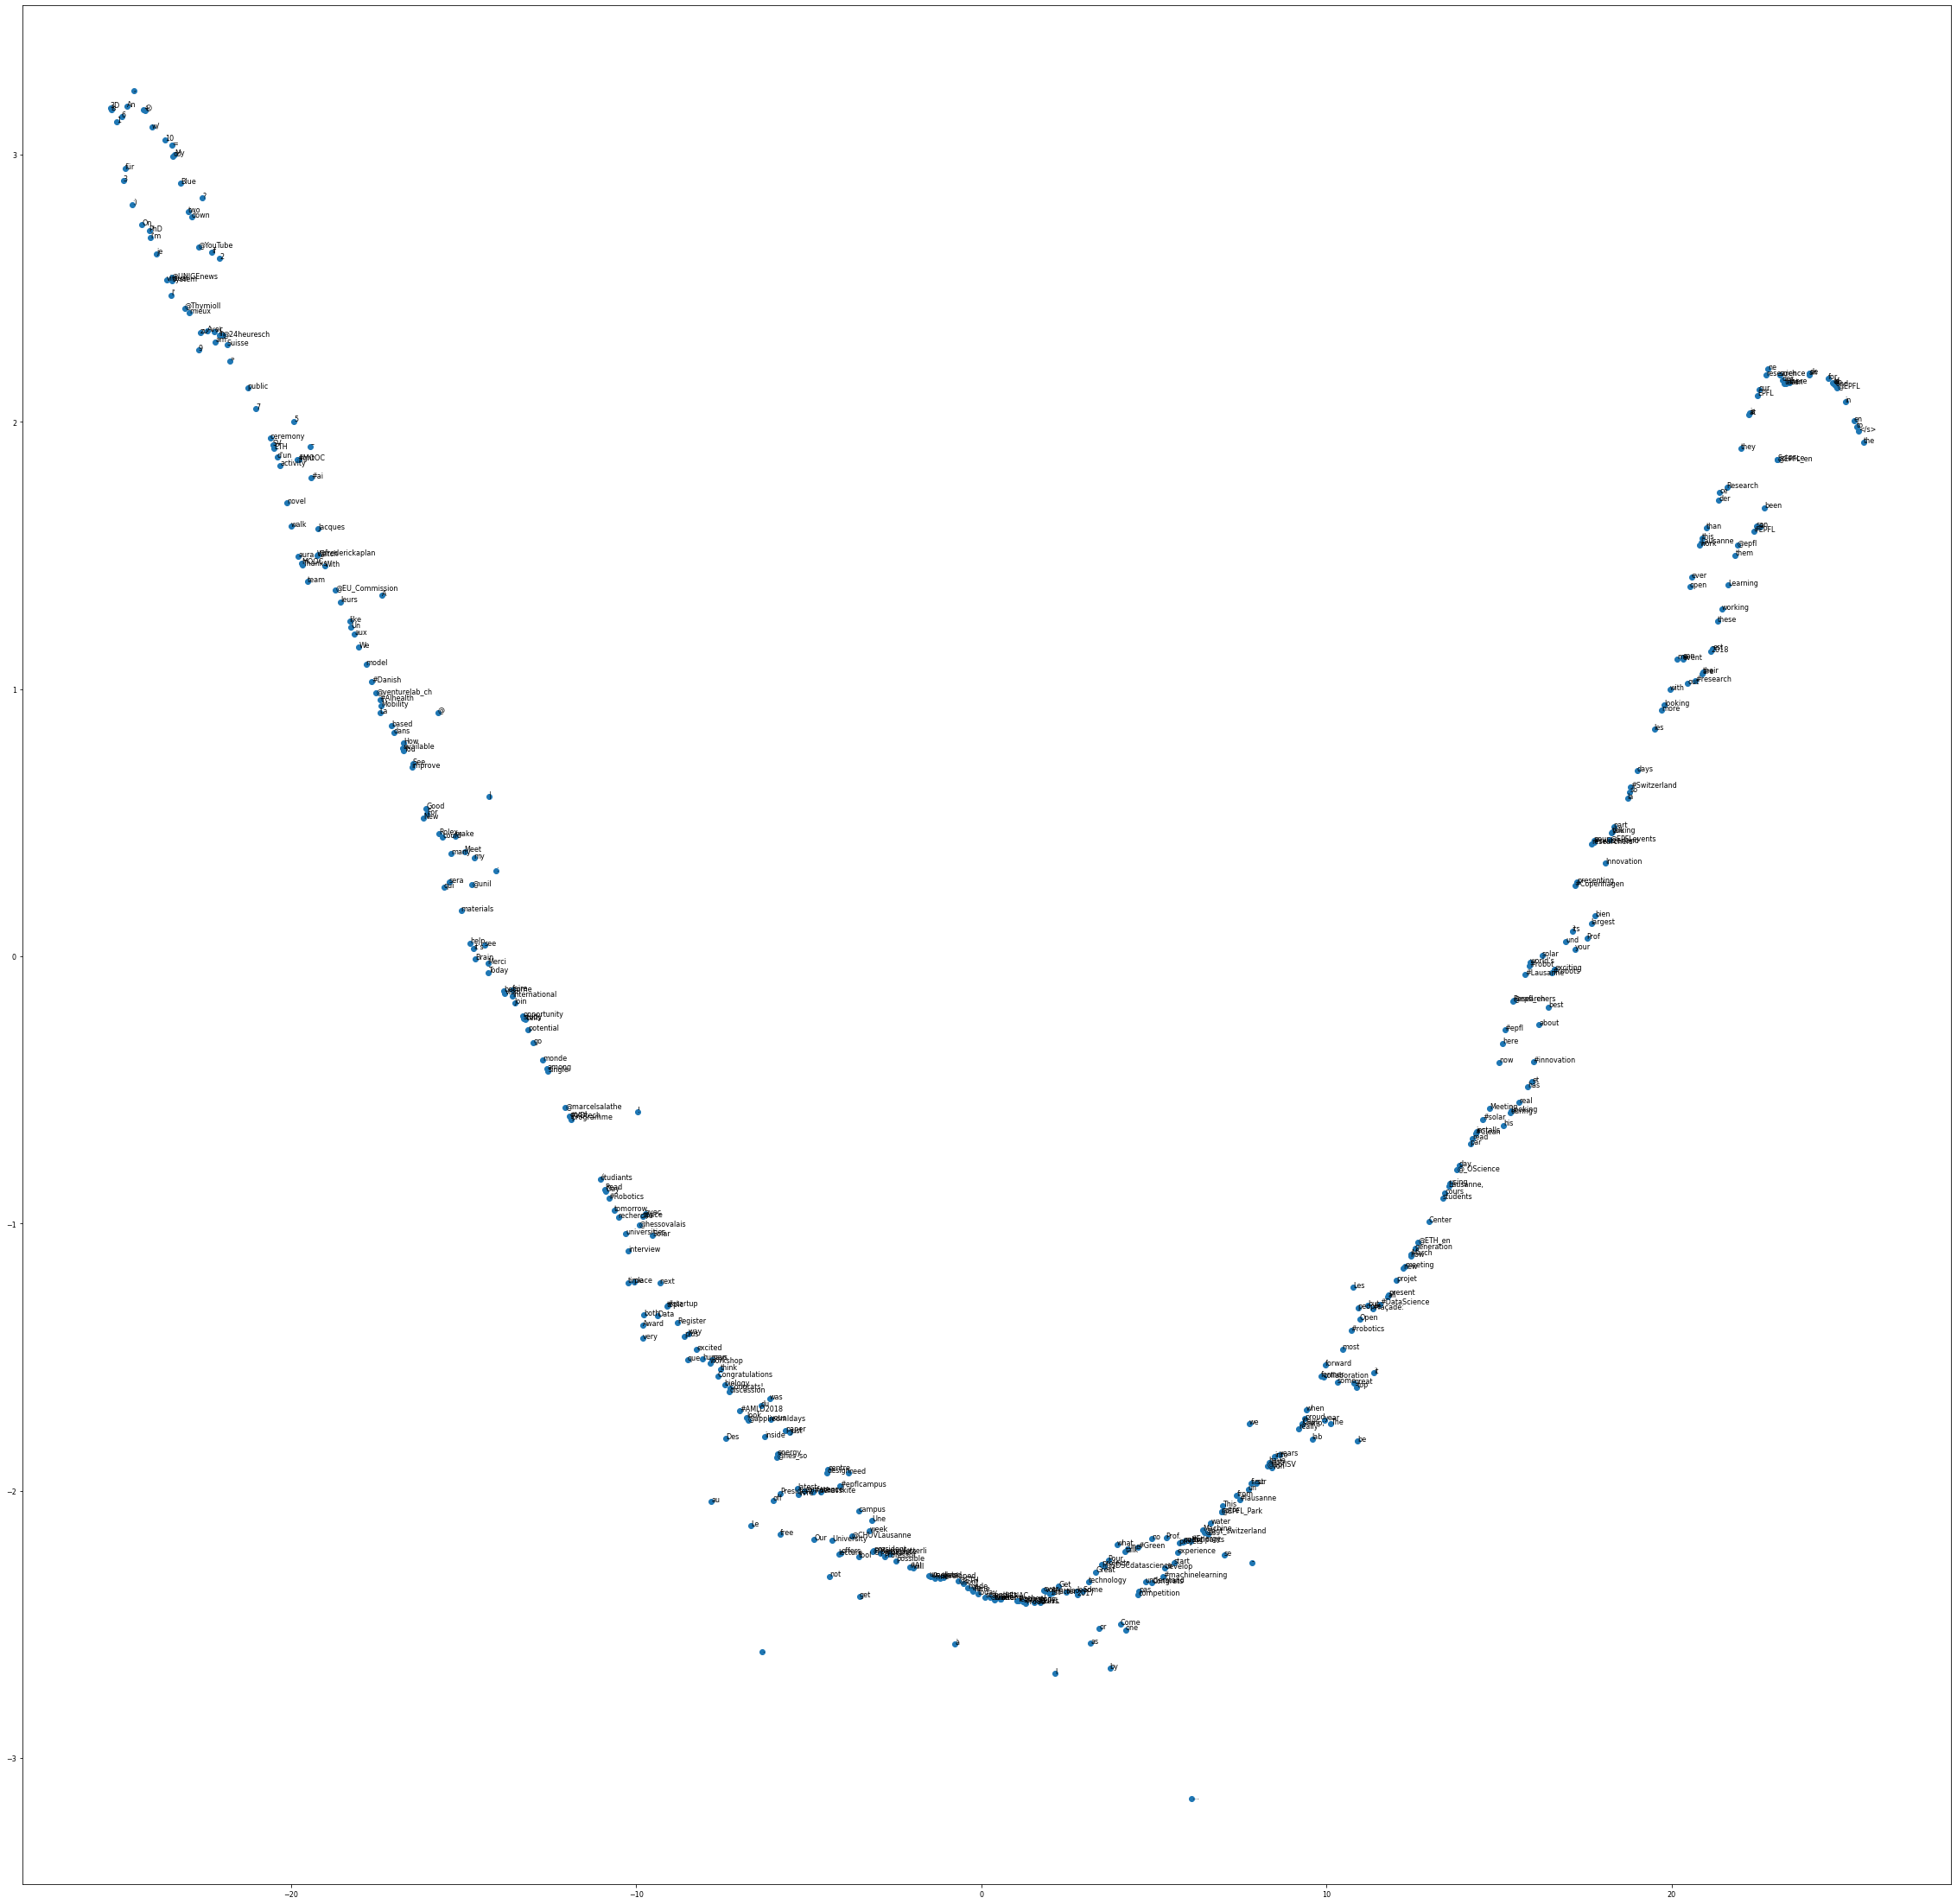

In [7]:
vis_data_x = vis_data[:,0]
vis_data_y = vis_data[:,1]

plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(40, 40)) 
plt.scatter(vis_data_x, vis_data_y)

for label, x, y in zip(vocabulary, vis_data_x, vis_data_y):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

## Question

Observe the plot of word embeddings. Do you observe any patterns?

<b> You will not encounter a very obvious pattern (because the data is small and too much EPFL oriented) but some small patterns. </b>

Words are close to their context words i.e. Professor and MartinVetterli, President and MartinVetterli, Register and conference.

Similar words are clustered together: conference, workshop, discussion.

Stop words are not clustered together with other words because they cooccur with many words.

Artikels are close to each other (Une, du, des)

## Question

Write a python function to find the most similar terms for a given term. The similarity between two terms is defined as the cosine similarity between their corresponding word embeddings.

Find the top 5 terms that are most similar to 'la', 'EPFL', '#robot', 'this', 

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

def find_most_similar(input_term, word_embeddings, vocabulary, num_terms=3):
    term_embeddings_dict = {}
    for i,term in enumerate(vocabulary):
        term_embeddings_dict[term] = word_embeddings[i]
        
    if input_term not in term_embeddings_dict:
        return "Term not in the vocabulary"
    
    input_term_embedding = term_embeddings_dict[input_term]
    term_similarities = []
    for term, embedding in term_embeddings_dict.items():
        term_similarities.append([term, cosine_similarity(input_term_embedding.reshape((1,-1)), 
                                                          embedding.reshape((1,-1)))])
        
    sorted_terms = sorted(term_similarities, key = lambda x: -1 * x[1])[0:num_terms]
    
    return sorted_terms

# Note:
# cosine_similarity takes a matrix (of all word vectors) as input,
# so it's better not to loop through all terms to computer term_similarities for efficieny reasons
# I avoided doing this in this part for better readability, 
# although you will see matrix based solution in get_most_similar_documents
# in any case, you will never need to compute similarities by yourself, instead you can use:
# import gensim
# model = gensim.models.KeyedVectors.load_word2vec_format('model.vec')
# similar = model.most_similar(positive=['epfl'],topn=10)

find_most_similar('EPFL', word_embeddings, vocabulary, num_terms=5)

[['EPFL', array([[1.0000001]], dtype=float32)],
 ['#EPFL', array([[0.9999956]], dtype=float32)],
 ['more', array([[0.999995]], dtype=float32)],
 ['@EPFL_en', array([[0.9999949]], dtype=float32)],
 ['@EPFLevents', array([[0.9999949]], dtype=float32)]]

## Question [Optional]
​
Observe the word embeddings that are visualized in this link http://www.anthonygarvan.com/wordgalaxy/ . Can you make some interesting observations? 

# Basic Search Engine Using Word Embeddings



In this exercise, we would put our word embeddings to test by using them for information retrieval. 
The idea is that, the documents that have the most similar embedding vectors to the one belongs to query should rank higher.
The documents may not necessarily include the keywords in the query.



In [9]:
# Loading of libraries and documents
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import string
import math
from collections import Counter

# Read a list of documents from a file. Each line in a file is a document
with open("epfldocs.txt", ) as f:
    content = f.readlines()
        
original_documents = [x.strip() for x in content] 

## Question

Since both the documents and the query is of variable size, we should aggregate the vectors of the words in the query by some strategy. This could be taking the minimum vector, maximum vector or the mean. Fill in the code below.

In [10]:
# Create a dictionary of vectors for easier search
vector_dict = dict(zip(vocabulary, word_embeddings))

def aggregate_vector_list(vlist, aggfunc):
    if aggfunc == 'max':
        return np.array(vlist).max(axis=0)
    elif aggfunc == 'min':
        return np.array(vlist).min(axis=0)
    elif aggfunc == 'mean':
        return np.array(vlist).mean(axis=0)
    else:
        return np.zeros(np.array(vlist).shape[1])

possible_aggfuncs = ["max", "min", "mean"]

aggregated_doc_vectors = {}

# Aggregate vectors of documents beforehand
for aggfunc in possible_aggfuncs:
    aggregated_doc_vectors[aggfunc] = np.zeros((len(original_documents), word_embeddings.shape[1]))
    for index, doc in enumerate(original_documents):
        vlist = [vector_dict[token] for token in fasttext.tokenize(doc) if token in vector_dict]
        if(len(vlist) < 1):
            continue 
        else:
            aggregated_doc_vectors[aggfunc][index] = aggregate_vector_list(vlist, aggfunc) 

## Question
Aggregate the query and find the most similar documents using cosine distance between the query's vector and document's aggregated vector. Are they seem to relevant?

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

query = "EPFL"

def aggregate_query(query, aggfunc):
    tokens = fasttext.tokenize(query)
    if(len(tokens) == 1):
        if(tokens[0] in vocabulary):
            return vector_dict[tokens[0]]
    elif(len(tokens) > 1):
        vlist = []
        for token in tokens:
            if (token in vocabulary):
                vlist.append(vector_dict[token])
        
        return aggregate_vector_list(vlist, aggfunc)
    else:
        print("%s is not in the vocabulary." % (query))
    
def get_most_similar_documents(query_vector, aggfunc, k = 5):
    query_vector = query_vector.reshape(1, -1)
    # Calculate the similarity with each vector. 
    # Hint: Cosine similarity function takes a matrix as input so you do not need to loop through each document vector.
    sim = cosine_similarity(query_vector, aggregated_doc_vectors[aggfunc])
    
    # Rank the document vectors according to their cosine similarity with 
    indexes = np.argsort(sim, axis=-1, kind='quicksort', order=None) # This is sorted in ascending order
    indexes = indexes[0]
    indexes = indexes[::-1] # Convert to descending
    return indexes

def search_vec_embeddings(query, topk = 10, aggfunc = 'mean'):
    query_vector = aggregate_query(query, aggfunc)
    indexes = get_most_similar_documents(query_vector, aggfunc)
    # Print the top k documents
    indexes = indexes[0:topk]
    for index in indexes:
        print(original_documents[index])

In [12]:
search_vec_embeddings('EPFL', aggfunc = 'mean')

EPFL morning #epfl #lausanne #photography https://t.co/6IXddicblu
Today #EPFL students visit  #AdNovum Lausanne workshop on #mobilepayment  #security @EPFL @EPFL_en https://t.co/5BJYkQbyBL
And on our way to Lausanne! @EPFL @stratocore #SCM2018 @CalvinHyacinth https://t.co/MfRjLnUOpT
Sunrise over the #RolexLearningCenter #EPFL #thingofbeauty #nature #winter #Lausanne @EPFL @EPFL_en @MyLausanne #Switzerland @MySwitzerland_e https://t.co/T2OkBgYqsz
Open call for Science and Technology #womenentrepreneurs! Applications for the 2018 Musy Award @EPFL VP Innovation are open. Apply to get a chance to win CHF 50,000. Find out more here https://t.co/l4GcxPLvsI https://t.co/T9bIL1ADQz
Today @EPFL  50 girls are coding their own apps on Smartphone, @EPFLevents https://t.co/4D9qK0bn80
EPFL launches a new doctoral programme to develop the innovation potential of PhD students https://t.co/XGW221z7ZQ #EPFLinnovators @EPFL https://t.co/H4f3DHx6I9
Modeling human behavior with @Airbnb.  Researchers at @Id

## Question
Compare the results with the vector space retrieval.


In [13]:
# VECTOR SPACE RETRIEVAL (From Exercise 1)
# Retrieval oracle 
from operator import itemgetter
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english')
features = tf.fit_transform(original_documents)
npm_tfidf = features.todense()

# Return all document ids that that have cosine similarity with the query larger than a threshold
def search_vec_sklearn(query, topk = 10, features = features, threshold=0.1):
    new_features = tf.transform([query])
    print(new_features.shape)
    cosine_similarities = linear_kernel(new_features, features).flatten()
    related_docs_indices, cos_sim_sorted = zip(*sorted(enumerate(cosine_similarities), key=itemgetter(1), 
                                                       reverse=True))
    doc_ids = []
    for i, cos_sim in enumerate(cos_sim_sorted):
        if cos_sim < threshold or i >= topk:
            break
        doc_ids.append(related_docs_indices[i])
    
    for index in doc_ids:
        print(original_documents[index])

In [14]:
search_vec_embeddings('EPFL', aggfunc = 'mean')
print("---------------------------------")
search_vec_sklearn("EPFL")

EPFL morning #epfl #lausanne #photography https://t.co/6IXddicblu
Today #EPFL students visit  #AdNovum Lausanne workshop on #mobilepayment  #security @EPFL @EPFL_en https://t.co/5BJYkQbyBL
And on our way to Lausanne! @EPFL @stratocore #SCM2018 @CalvinHyacinth https://t.co/MfRjLnUOpT
Sunrise over the #RolexLearningCenter #EPFL #thingofbeauty #nature #winter #Lausanne @EPFL @EPFL_en @MyLausanne #Switzerland @MySwitzerland_e https://t.co/T2OkBgYqsz
Open call for Science and Technology #womenentrepreneurs! Applications for the 2018 Musy Award @EPFL VP Innovation are open. Apply to get a chance to win CHF 50,000. Find out more here https://t.co/l4GcxPLvsI https://t.co/T9bIL1ADQz
Today @EPFL  50 girls are coding their own apps on Smartphone, @EPFLevents https://t.co/4D9qK0bn80
EPFL launches a new doctoral programme to develop the innovation potential of PhD students https://t.co/XGW221z7ZQ #EPFLinnovators @EPFL https://t.co/H4f3DHx6I9
Modeling human behavior with @Airbnb.  Researchers at @Id

## Question
You will realize that not all the words in your queries are in the vocabulary, so your queries fail to retrieve any documents. Think of possible solutions to overcome this problem.

1. Use a bigger corpus
2. Try pretrained vectors (check glove)
3. Preprocess (lowercase, stem) (if the former 2 options are not available)
4. Use heuristics to find similar words and aggregate their vectors, i.e. get a word in the query's stem and the words that have the same stem, get the words with close edit distance to catch hashtags and mentions etc.
    Some examples:
    * MAGA -> What it stands for: Make America Great Again (What MAGA stands for)
    * MAGA -> Cooccuring words, i.e. TCOT (Top Conservatives on Twitter, likely precedes the slogan MAGA)
    * MAGA -> words of concept (Republican) = {Tcot, PJNET, Republic etc.} use the concept vector / average of the word vectors' belonging to that concept
    Use wordnet (https://wordnet.princeton.edu) but no MAGA unfortunately :(
5. Search the literature for more ideas.